In [1]:
%matplotlib inline
import pysd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
model = pysd.read_vensim('C:/repos/Defence-Autonomy/wip_model.mdl')
# model.doc

# Control variables

In [4]:
stress_to_willingness_values = np.arange(1,3.1,0.5)

delay_in_delivery_values = np.arange(1, 22, 4)

geopolitical_shock_values = np.arange(0.0, 0.5, 0.1)

In [5]:
def run_results(params_dict):
    res = model.run(params_dict,
                return_columns=['Constrained Defence Spending', 
                                'Cumulative Defence Spending', 
                                'rate of orders fulfilled',
                                'rate of expenses',
                                'Cumulative Earnings'])
    
    return res

In [ ]:
# # Columns needed 
# columns = [
#     'Constrained Defence Spending',
#     'Cumulative Defence Spending',
#     'rate of orders fulfilled',
#     'Cumulative Earnings',
#     'stress_to_willingness'
# ]

# Stress to willingness to spend only impacts
- Defence Spending 
- Cumulative Earnings

In [6]:
control_dict = {}
results_list =[]

# loop over all possible stress values
for stress in stress_to_willingness_values:
    # each iteration gets a different stress value
    control_dict['stress to willingness'] = stress
    output_df = run_results(params_dict=control_dict) 
    output_df['stress_to_willingness'] = stress
    results_list.append(output_df)

willingness_to_spend_results_df = pd.concat(results_list)

In [7]:
willingness_to_spend_results_df.reset_index(inplace=True)

In [24]:
# Export results for analysis
willingness_to_spend_results_df[['time', 'Cumulative Earnings',
       'stress_to_willingness']].to_csv('unwillingness_res.csv', index=False)

Shows how sensitive willingness to Defence Spending

Text(0, 0.5, 'Cumulative Earnings (Billion €)')

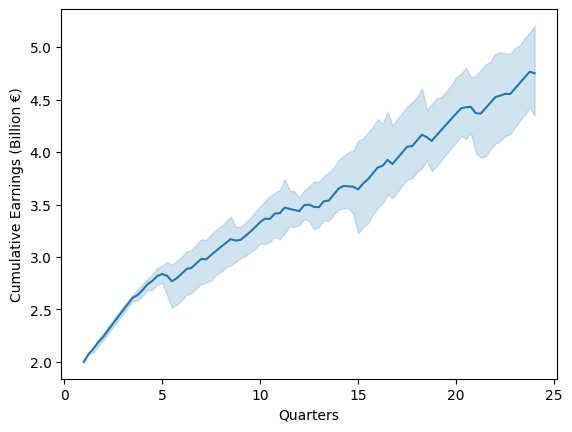

In [13]:
sns.lineplot(data=willingness_to_spend_results_df,
             x='time',
             y='Cumulative Earnings',
             )
plt.xlabel('Quarters')
plt.ylabel('Cumulative Earnings (Billion €)')

C:\Users\Keshav\AppData\Local\Temp\ipykernel_7796\3526620885.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=willingness_to_spend_results_df,


Text(0, 0.5, 'Cumulative Earnings (Billion €)')

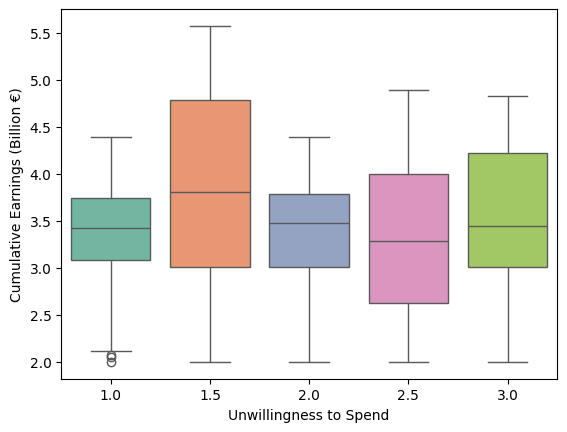

In [22]:
sns.boxplot(data=willingness_to_spend_results_df,
             x='stress_to_willingness',
             y='Cumulative Earnings',
             palette='Set2')
plt.xlabel('Unwillingness to Spend')
plt.ylabel('Cumulative Earnings (Billion €)')

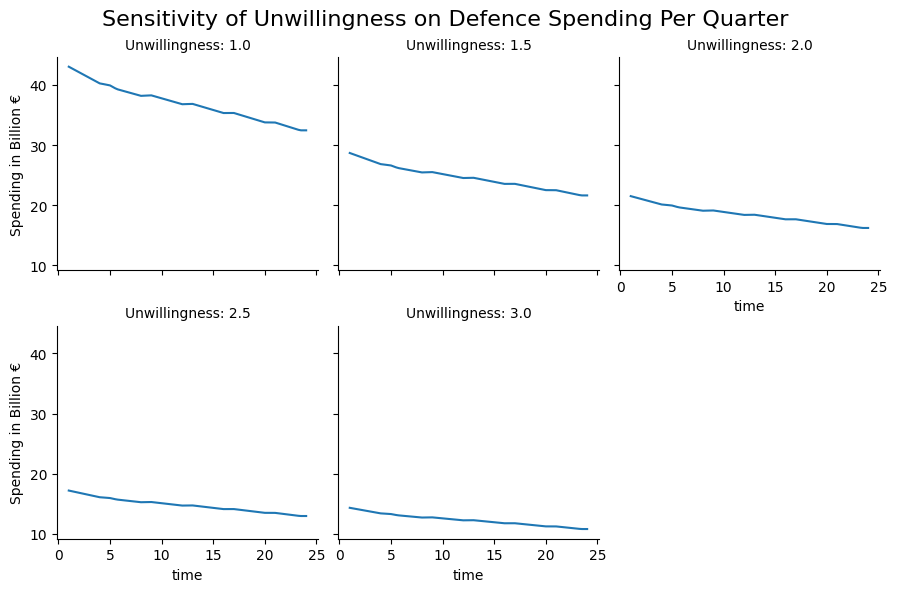

In [ ]:
g = sns.FacetGrid(willingness_to_spend_results_df,
                  col='stress_to_willingness', 
                  col_wrap=3, sharey=True)
g.map(sns.lineplot, 'time', 'Constrained Defence Spending')
g.set_titles("Unwillingness: {col_name}")
g.set_ylabels('Spending in Billion €')

# Add overall title
g.fig.suptitle("Sensitivity of Unwillingness on Defence Spending Per Quarter", 
               fontsize=16)

# Adjust spacing to make room for the title
g.fig.subplots_adjust(top=0.9)  # Move the plots down to make space for the title

plt.show()


# Delay in Delivery
- Cumulative Earnings

In [27]:
control_dict = {}
results_list =[]

# loop over all possible stress values
for delay in delay_in_delivery_values:
    # each iteration gets a different delay value
    control_dict['delay in delivery'] = delay
    output_df = run_results(params_dict=control_dict) 
    output_df['delay_in_delivery'] = delay
    results_list.append(output_df)

delay_results = pd.concat(results_list)
delay_results.reset_index(inplace=True)

In [34]:
delay_results[['time', 'Cumulative Earnings', 'delay_in_delivery']].to_csv('results_delay.csv', index=False)

C:\Users\Keshav\AppData\Local\Temp\ipykernel_7796\4049947275.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=delay_results, x='time', y='Cumulative Earnings',


Text(0, 0.5, 'Cumulative Earnings (Billion €)')

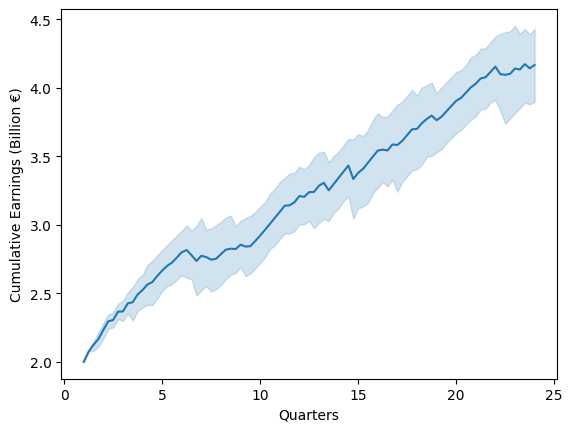

In [ ]:
sns.lineplot(data=delay_results, x='time', y='Cumulative Earnings')
plt.xlabel('Quarters')
plt.ylabel('Cumulative Earnings (Billion €)')

C:\Users\Keshav\AppData\Local\Temp\ipykernel_7796\113927838.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=delay_results,


Text(0, 0.5, 'Cumulative Earnings (Billion €)')

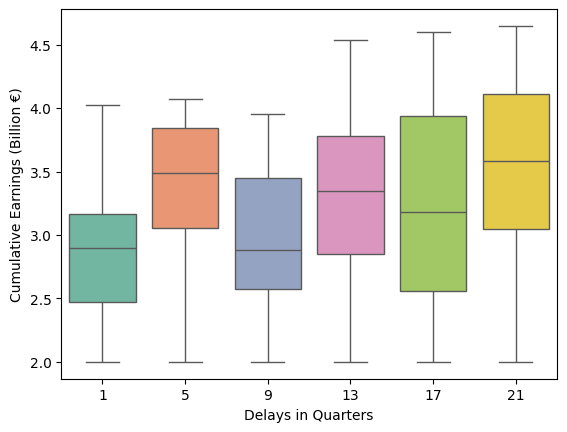

In [ ]:
sns.boxplot(data=delay_results,
            x='delay_in_delivery', 
            y='Cumulative Earnings',
            palette='Set2')
plt.xlabel('Delays in Quarters')
plt.ylabel('Cumulative Earnings (Billion €)')

# Geopolitical Shock

In [35]:
control_var = {}
results_list =[]

for shock in geopolitical_shock_values:
    control_var['geopolitical shock probability'] = shock
    output_df = run_results(params_dict=control_var) 
    output_df['geopolitical_shock_values'] = shock
    results_list.append(output_df)

geo_results_df = pd.concat(results_list)
geo_results_df.reset_index(inplace=True)

In [38]:
geo_results_df['geo_shock_pct'] = (geo_results_df['geopolitical_shock_values'] * 100).astype(int).astype(str) + '%'

In [40]:
# Export results
geo_results_df[['geo_shock_pct', 'Cumulative Earnings']].to_csv('results_geo.csv', index=False)

Text(0, 0.5, 'Cumulative Earnings (Billion €)')

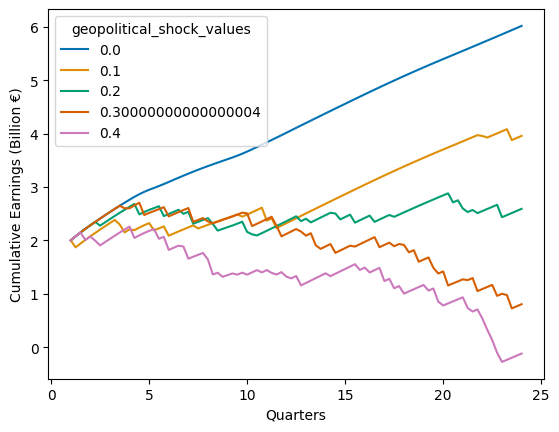

In [36]:
sns.lineplot(data=geo_results_df, 
             x='time', 
             y='Cumulative Earnings', hue="geopolitical_shock_values",
             palette='colorblind')
plt.xlabel('Quarters')
plt.ylabel('Cumulative Earnings (Billion €)')

C:\Users\Keshav\AppData\Local\Temp\ipykernel_7796\254370162.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=geo_results_df,


Text(0, 0.5, 'Cumulative Earnings (Billion €)')

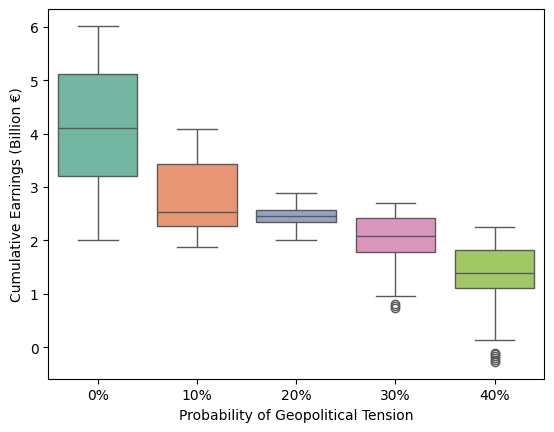

In [39]:
sns.boxplot(data=geo_results_df, 
             x='geo_shock_pct', 
             y='Cumulative Earnings',
             palette='Set2')
plt.xlabel('Probability of Geopolitical Tension')
plt.ylabel('Cumulative Earnings (Billion €)')

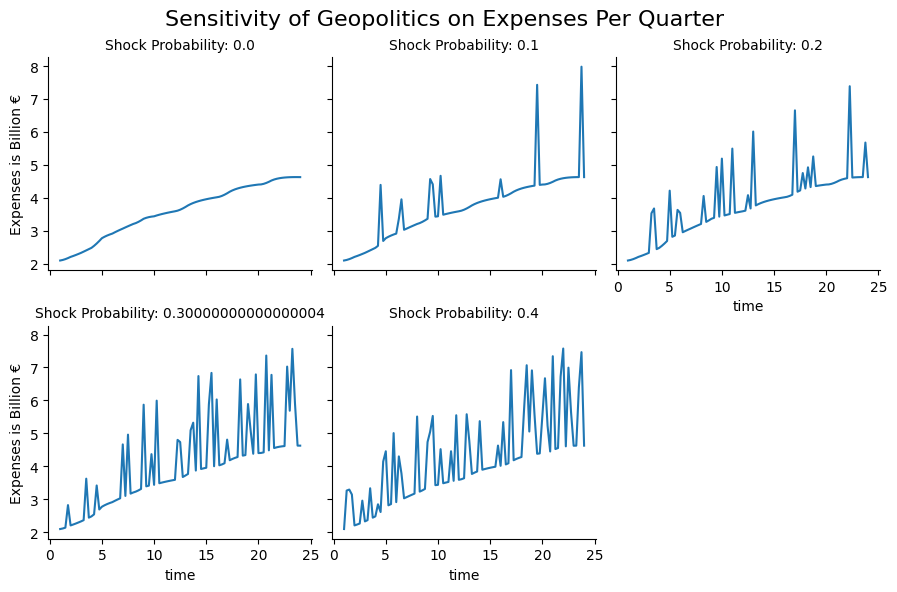

In [ ]:
g = sns.FacetGrid(geo_results_df,
                  col='geopolitical_shock_values', 
                  col_wrap=3, sharey=True)
# g.map(sns.lineplot, 'time', 'rate of expenses')
g.map(sns.lineplot, 'time', 'rate of expenses')
g.set_titles("Shock Probability: {col_name}")
g.set_ylabels('Expenses is Billion €')

# Add overall title
g.fig.suptitle("Sensitivity of Geopolitics on Expenses Per Quarter", 
               fontsize=16)

# Adjust spacing to make room for the title
g.fig.subplots_adjust(top=0.9)  # Move the plots down to make space for the title

plt.show()


# Simulate all together

In [41]:
stress_to_willingness_values = np.arange(1,3.1,0.5)
stress_to_willingness_values

delay_in_delivery_values = np.arange(1, 22, 5)
delay_in_delivery_values

geopolitical_shock_values = np.arange(0.0, 0.5, 0.1)

In [42]:
# Simiulation
from itertools import product

all_results_list = []

for stress, delay, shock in product(stress_to_willingness_values, 
                                    delay_in_delivery_values, 
                                    geopolitical_shock_values):
    control_var = {
        'stress to willingness': stress,
        'delay in delivery': delay,
        'geopolitical shock probability': shock
    }
    
    output_df = run_results(params_dict=control_var) 
    
    output_df['stress_to_willingness'] = stress
    output_df['delay'] = delay
    output_df['shock'] = shock
    
    all_results_list.append(output_df)


all_results_df = pd.concat(all_results_list)
all_results_df.reset_index(inplace=True)

In [45]:
all_results_df.to_csv('results_all.csv', index=False)

In [43]:
# For plotting
all_results_df['shock_pct'] = (all_results_df['shock'] * 100).astype(int).astype(str) + '%'

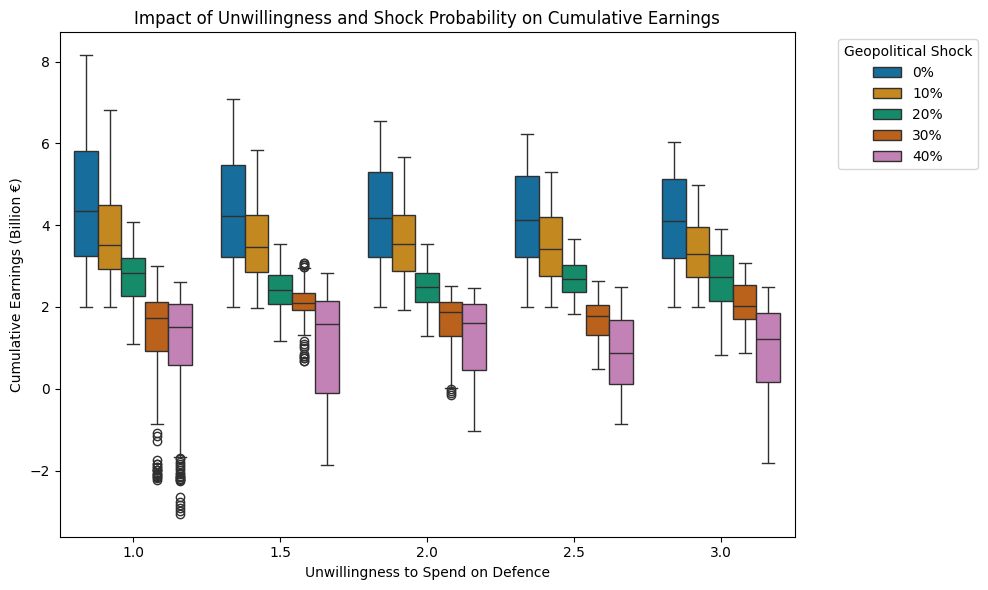

In [48]:
# Create the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='stress_to_willingness', 
    y='Cumulative Earnings', 
    hue='shock_pct', 
    data=all_results_df,
    palette='colorblind'
)

plt.xlabel("Unwillingness to Spend on Defence")
plt.ylabel("Cumulative Earnings (Billion €)")
plt.title("Impact of Unwillingness and Shock Probability on Cumulative Earnings")

# Move legend outside the plot area
plt.legend(title="Geopolitical Shock", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
